<a href="https://colab.research.google.com/github/arjun372/NE795-SciML/blob/main/Homework%204/Homework_4_Problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 - Problem 4 - SA with MC Sampling

In [46]:
import numpy as np

def calculate_sobol_indices(a):
    """
    Calculate the first-order Sobol indices for the G function.
    :param a: A numpy array of parameters.
    :return: The first-order Sobol indices and the total variance of the G function.
    """
    # Calculate the variance of each g_i(X_i)
    var_g_i = 1 / (3 * (1 + a) ** 2)

    # Calculate the overall variance Var(G)
    var_G = np.prod(var_g_i + 1) - 1

    # First-order Sobol indices
    S_i = var_g_i / var_G

    return S_i, var_G

def sobol_g_function(x, a):
    """
    The Sobol G-function.
    :param x: A numpy array of input samples.
    :param a: A numpy array of parameters.
    :return: The output of the G function.
    """
    return np.prod((np.abs(4 * x - 2) + a) / (1 + a), axis=1)

def monte_carlo_sobol_indices(a, n_samples=10000):
    """
    Calculate the first-order Sobol indices using Monte Carlo sampling.
    :param a: A numpy array of parameters.
    :param n_samples: The number of samples to use for the Monte Carlo estimation.
    :return: The first-order Sobol indices.
    """
    # Generate two sets of random samples
    X = np.random.rand(n_samples, len(a))
    X_prime = np.random.rand(n_samples, len(a))

    # Evaluate the Sobol G-function for both sets
    Y = sobol_g_function(X, a)
    Y_prime = sobol_g_function(X_prime, a)

    # Calculate the total variance
    var_Y = np.var(Y, ddof=1)

    # Initialize an array to store the first-order Sobol indices
    S_i = np.zeros(len(a))

    # Loop over each parameter
    for i in range(len(a)):
        # Swap the i-th column of X with the i-th column of X_prime
        X_star = X.copy()
        X_star[:, i] = X_prime[:, i]

        # Evaluate the Sobol G-function with the swapped samples
        Y_star = sobol_g_function(X_star, a)

        # Estimate the first-order Sobol index for the i-th parameter
        S_i[i] = np.mean(Y * Y_star) - np.mean(Y) ** 2
        S_i[i] /= var_Y

    return S_i

In [48]:
# Parameters
d = 5
a = np.array([0, 0.5, 3, 10, 80])

# Calculate the first-order Sobol indices
S_i, var_G = calculate_sobol_indices(a)

# Print the results
print("First-order Sobol indices:", calculate_sobol_indices(a))

First-order Sobol indices: (array([5.87742352e-01, 2.61218823e-01, 3.67338970e-02, 4.85737481e-03,
       8.95812150e-05]), 0.5671419329179337)


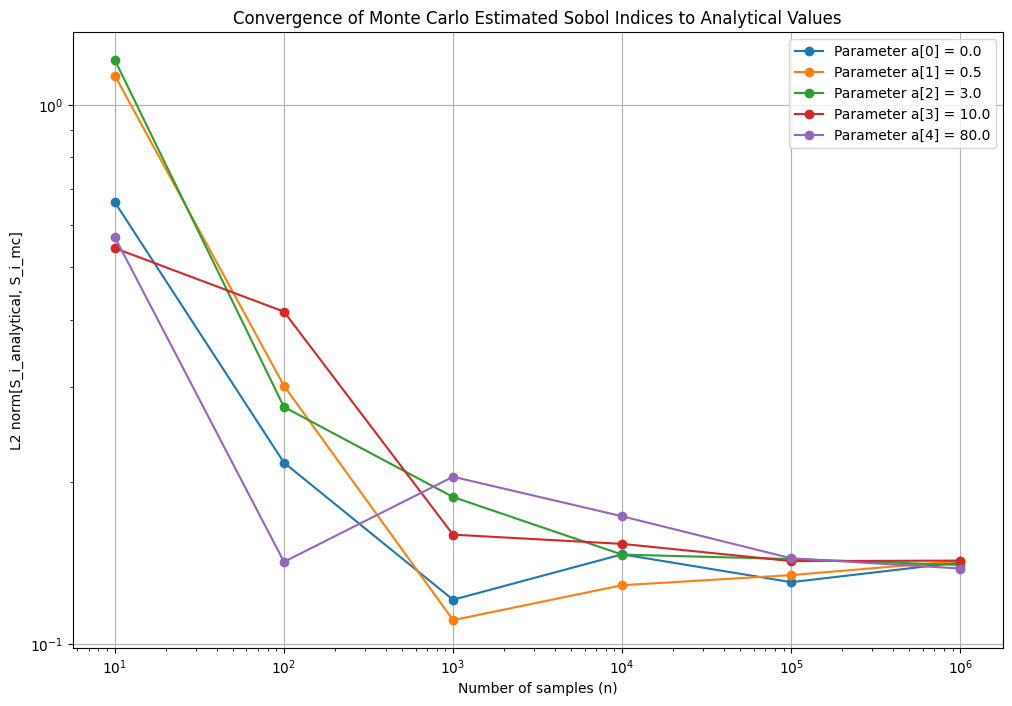

In [50]:
import matplotlib.pyplot as plt

# Parameters
d = 5
a = np.array([0, 0.5, 3, 10, 80])
n_values = [int(1e1), int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]

# Calculate analytical Sobol indices
S_i_analytical, _ = calculate_sobol_indices(a)

S_i_analytical = 1 - S_i_analytical

# Initialize plot
plt.figure(figsize=(12, 8))

np.random.seed(372)
# Calculate and plot differences for each n
for i, ai in enumerate(a):
    differences = []
    for n in n_values:
        S_i_mc = monte_carlo_sobol_indices(a, n_samples=n)
        #differences.append(np.abs(S_i_analytical[i] - S_i_mc[i]))
        differences.append(np.linalg.norm(S_i_analytical - S_i_mc))
    plt.plot(n_values, differences, 'o-', label=f'Parameter a[{i}] = {ai}')

# Formatting the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples (n)')
plt.ylabel('L2 norm[S_i_analytical, S_i_mc]')
plt.title('Convergence of Monte Carlo Estimated Sobol Indices to Analytical Values')
plt.legend()
plt.grid(True)

# Show plot
plt.show()